Baseline for predicting filtered shear stress (Autoregressive seasonal persistance method)

In [13]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'SS':data['SS'].ravel()})    # TTF and TSF not used
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel(), 'T_der':data['T_der'].ravel(), 'Vel_der':data['Vel_der'].ravel()})
                   # 'T_off':data['T_off'].ravel(), 'Vel_off':data['Vel_off'].ravel()})    # 8 features

df = a_t.merge(m_t, on='Time')

ydf = df['SS']
print(ydf.shape)


(132399,)


In [15]:
# Predict the next cycle same as the previous one

p = 350
df2 = pd.concat([ydf.shift(p), ydf], axis=1)
df2.columns = ['SS(t-p)', 'SS(t)']
print(df2.tail(5))


         SS(t-p)     SS(t)
132394  5.479662  5.471059
132395  5.481093  5.474545
132396  5.482621  5.478286
132397  5.484020  5.481751
132398  5.485400  5.484813


In [16]:
# Split into train-test

x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,0], df2.iloc[:,1], test_size=0.3, shuffle=False)
  
y_pred = x_test
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print("\nSEASONAL PERSISTANCE METHOD: \nRMSE: ", test_rmse, "\nR2 score: ", test_r2)



SEASONAL PERSISTANCE METHOD: 
RMSE:  0.18277522458885137 
R2 score:  -0.5763247339733704


Text(0.5, 1.0, '5000 Samples, Test data')

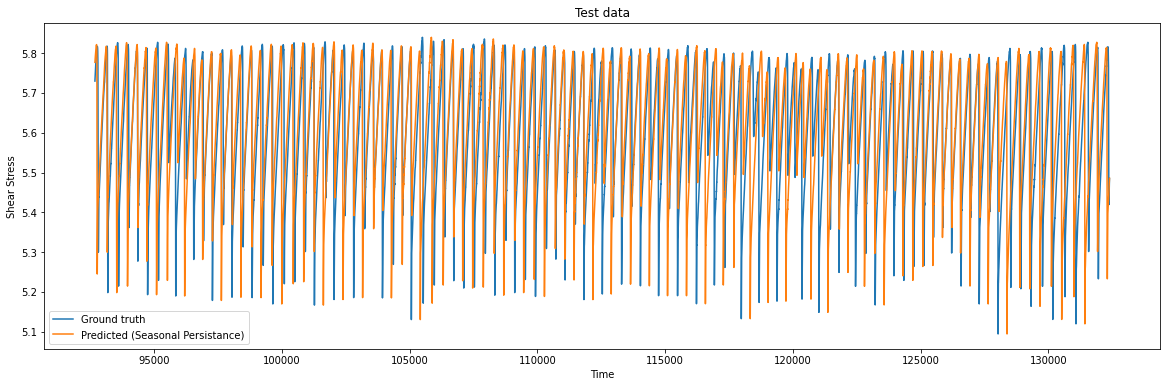

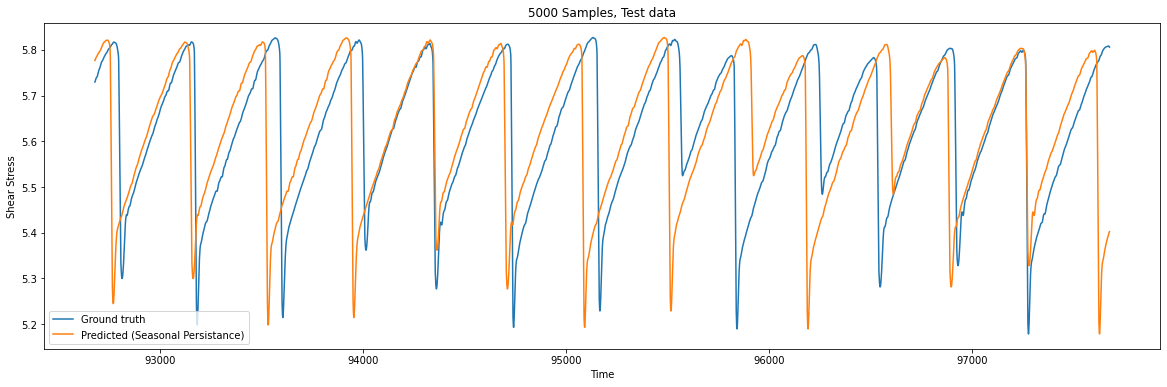

In [17]:
# Plotting

fig = plt.figure(1, figsize=(20,6))
#plt.plot(train_y)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.xlabel('Time')
plt.ylabel('Shear Stress')
plt.legend([ 'Ground truth', 'Predicted (Seasonal Persistance)'])
plt.title('Test data')

# Detail view plot

fig = plt.figure(2, figsize=(20,6))
#plt.plot(train_y)
plt.plot(y_test.index[:5000], y_test[:5000])
plt.plot(y_test.index[:5000], y_pred[:5000])
plt.xlabel('Time')
plt.ylabel('Shear Stress')
plt.legend([ 'Ground truth', 'Predicted (Seasonal Persistance)'])
plt.title('5000 Samples, Test data')
